In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_table('IOT\diabetes.tab.txt')

In [115]:
df.head(10)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


In [116]:
labels = list(df.columns)
print(labels)

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']


In [57]:
op1 = df.corr()

In [58]:
print(op1.iloc[-1:])

        AGE       SEX      BMI        BP        S1        S2        S3  \
Y  0.187889  0.043062  0.58645  0.441482  0.212022  0.174054 -0.394789   

         S4        S5        S6    Y  
Y  0.430453  0.565883  0.382483  1.0  


In [117]:
#Tinh cov(x,y)
avg_df = df.mean(axis=0)
print(avg_df)

AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64


In [118]:
print(len(df))

442


## CORRELATION COEFFICIENT

In [2]:
def get_corr_1(df):
    # remove object type
    drop_col = []
    for i in df.columns:
        if df[i].dtypes == object:
            drop_col.append(i)
    df = df.drop(columns = drop_col)

    list_cov_x_y = []
    len_col = len(df.columns)
    len_row = len(df)
    labels = list(df.columns)
    print(labels)
    #COV(x, y)
    list_cov_x_y = []
    len_col = len(df.columns)
    len_row = len(df)
    print(len_col, len_row)
    for i in range(0,len_col):
        cov_x_y = 0.0
        for j in range(0,len_row):
            # print(df.iloc[j,i])
            cov_x_y += (df.iloc[j,i]-df.iloc[:,i].mean())*(df.iloc[j,len_col-1]-df.iloc[:,len_col-1].mean())
        cov_x_y /= len_row
        list_cov_x_y.append(cov_x_y)
    #COV(x)
    list_cov_x = []

    for i in range(0,len_col):
        cov_x = 0.0
        for j in range(0,len_row):
            cov_x += (df.iloc[j,i]-df.iloc[:,i].mean())**2
        cov_x /= (len_row-1)
        list_cov_x.append(cov_x**0.5)
    #COV(y)
    list_cov_y = []
    for i in range(0,len_col):
        cov_y = 0.0
        for j in range(0,len_row):
            cov_y += (df.iloc[j,len_col-1]-df.iloc[:,len_col-1].mean())**2
        cov_y /= (len_row-1)
        list_cov_y.append(cov_y**0.5)
    #CORR(x,y)
    list_corr = []
    for i in range(0,len_col):
        list_corr.append(list_cov_x_y[i]/(list_cov_x[i]*list_cov_y[i]))
    #CREATE CORR DATAFRAME
    list_corr = pd.DataFrame(list_corr, columns=['Y'])
    labels = pd.Index(labels)
    list_corr = list_corr.set_index(labels)
    return list_corr

In [119]:
corr_matrix = get_corr_1(df)

11


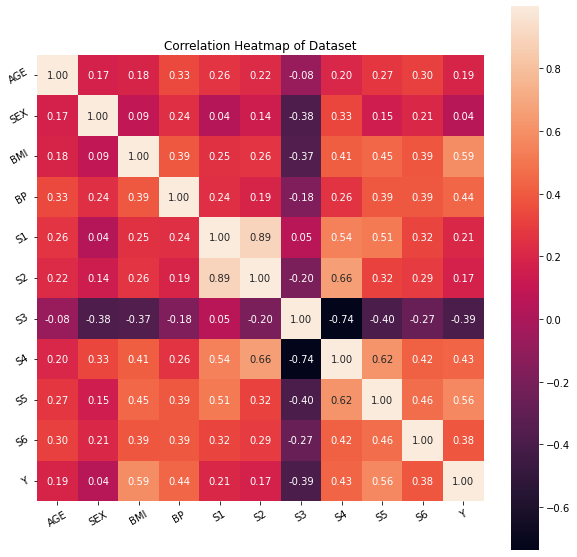

In [120]:
plt.figure(figsize=(10, 10))
plt.title('Correlation Heatmap of Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()  

## TRAIN TEST SPLIT

In [64]:
def train_test_split(features, labels, test_size, random_state):
    shuffle_feature_df = features.sample(frac=random_state,replace=True)
    shuffle_label_df = pd.DataFrame(columns=labels.columns)
    # print(shuffle_feature_df.head())

    for index, row in shuffle_feature_df.iterrows():
        # print(index)
        shuffle_label_df.loc[len(shuffle_label_df)] = labels.loc[index]
    test_size = int(0.8*len(shuffle_feature_df))
    X_train = shuffle_feature_df[test_size:]
    X_test = shuffle_feature_df[:test_size]
    y_train = shuffle_label_df[test_size:]
    y_test = shuffle_label_df[:test_size]
    return X_train, X_test, y_train, y_test

## CONNECT DATABASE

In [3]:
import mysql.connector as mysql
from mysql.connector import Error
import sqlite3

In [30]:
city_db = pd.read_csv('city_day.csv')
city_db.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [66]:
# Create database

'''
try:
    connection = mysql.connect(host='localhost',user='root',password='cuong#Super2001')
    if connection.is_connected():
        cursor = connection.cursor()
        cursor.execute('CREATE DATABASE if not exists air_quality')
        print('Database is created')
        
except Error as e:
    print('Error connect to MySQL')

'''

Database is created


In [36]:
def checkTableExists(schema_name, table_name):
    try:
        connection = mysql.connect(host='localhost',database=schema_name,user='root',password='cuong#Super2001')
        if connection.is_connected():
            print('MySQL is connected')
            cursor = connection.cursor()
            sql = '''select count(*) from information_schema.tables
                    where table_schema=(%s)
                    and table_name=(%s)'''
            cursor.execute(sql,(schema_name,table_name))
            print('MySQL is connected 2')
            result = cursor.fetchone()[0]
            connection.commit()
            cursor.close()
            if result == 0:
                return False
            else:
                return True
    except Error as e:
        print('Error connect to MySQL: ',e)
        return True

In [ ]:
# Check if table exists, drop it
'''
exist = checkTableExists('air_quality','raw_data')
print(exist)
if exist:
    try:
        connection = mysql.connect(host='localhost',database='air_quality',user='root',password='cuong#Super2001')
        if connection.is_connected():
            cursor = connection.cursor()
            tbl_name = "raw_data"
            sql = "drop table if exists "+tbl_name
            cursor.execute(sql)
            print('Table was dropped')
            connection.commit()
            cursor.close()
    except Error as e:
        print('Error',e)

'''

In [10]:
# Create table for correlation matrix
try:
    connection = mysql.connect(host='localhost',database='air_quality',user='root',password='cuong#Super2001')
    if connection.is_connected():
        cursor = connection.cursor()
        cursor.execute('CREATE TABLE if not exists corr_matrix (`PM2.5` double,`PM10` double,`NO` double,`NO2` double,NOx double,`NH3` double,`CO` double,`SO2` double,O3 double,Benzene double,Toluene double,Xylene double,AQI double)')
        print('New table was created')
        connection.commit()
        cursor.close()
except Error as e:
    print('Error')



New table was created


In [4]:
# get all records from database

try:
    connection = mysql.connect(host='localhost',database='air_quality',user='root',password='cuong#Super2001')
    if connection.is_connected():
        cursor = connection.cursor()
        sql = "select * from air_quality_raw"
        cursor.execute(sql)
        record = cursor.fetchall()
        print(len(record))
        connection.commit()
        cursor.close()
except Error as e:
    print('Error',e)

29531


In [5]:
df = pd.DataFrame(record,columns=['ID','City','Date','PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket'])
# df = pd.read_csv('IOT/city_day.csv')
df = df.drop(columns=['ID'])

In [6]:
new_df = df.dropna()
new_df.shape

(6236, 16)

In [7]:
corr_matrix = get_corr_1(new_df)
# corr_matrix = new_df.corr()

['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
13


In [9]:
corr_matrix

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,0.999840,0.895399,0.604142,0.558965,0.618606,0.581932,0.422418,0.249527,0.293644,0.203540,0.475858,0.068730,0.923880
PM10,0.895399,0.999840,0.633238,0.625072,0.672885,0.585461,0.395568,0.280256,0.306306,0.222341,0.518638,0.092881,0.916429
NO,0.604142,0.633238,0.999840,0.527341,0.875453,0.432725,0.292865,0.200932,0.048594,0.377871,0.541059,0.134848,0.621932
NO2,0.558965,0.625072,0.527341,0.999840,0.692162,0.387326,0.231736,0.386108,0.251822,0.246768,0.499024,0.081061,0.576215
NOx,0.618606,0.672885,0.875453,0.692162,0.999840,0.411056,0.335994,0.192063,0.083124,0.492625,0.596353,0.183245,0.658159
NH3,0.581932,0.585461,0.432725,0.387326,0.411056,0.999840,0.449268,0.192542,0.157246,0.101497,0.323511,0.015098,0.589601
CO,0.422418,0.395568,0.292865,0.231736,0.335994,0.449268,0.999840,0.046110,0.058779,0.107551,0.200819,0.111246,0.494429
SO2,0.249527,0.280256,0.200932,0.386108,0.192063,0.192542,0.046110,0.999840,0.252198,-0.003376,0.155421,0.002030,0.254645
O3,0.293644,0.306306,0.048594,0.251822,0.083124,0.157246,0.058779,0.252198,0.999840,-0.037911,0.068538,-0.079159,0.334555
Benzene,0.203540,0.222341,0.377871,0.246768,0.492625,0.101497,0.107551,-0.003376,-0.037911,0.999840,0.469180,0.281088,0.207894


In [11]:
# Import records of corr_matrix into database
try:
    connection = mysql.connect(host='localhost',database='air_quality',user='root',password='cuong#Super2001')
    if connection.is_connected():
        cursor = connection.cursor()
        for i,row in corr_matrix.iterrows():
            sql = "INSERT INTO corr_matrix VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql,tuple(row))
            # print('Inserted record')
        connection.commit()
        cursor.close()
except Error as e:
    print('Error')


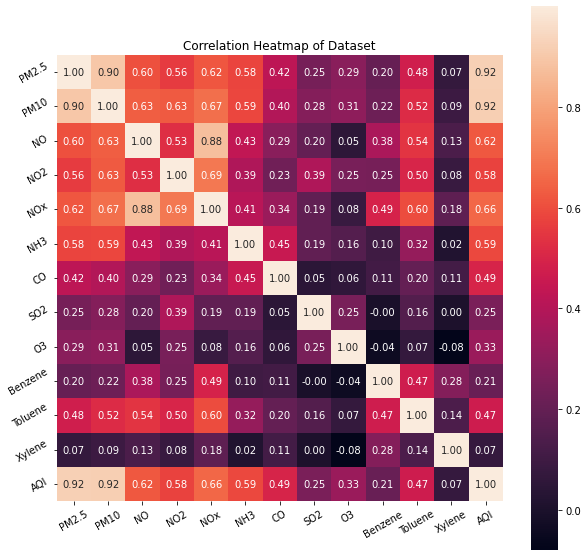

In [8]:
plt.figure(figsize=(10, 10))
plt.title('Correlation Heatmap of Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()  

In [12]:
# get all records from corr_matrix db
try:
    connection = mysql.connect(host='localhost',database='air_quality',user='root',password='cuong#Super2001')
    if connection.is_connected():
        cursor = connection.cursor()
        sql = "select * from corr_matrix"
        cursor.execute(sql)
        corr_record = cursor.fetchall()
        print(len(corr_record))
        connection.commit()
        cursor.close()
except Error as e:
    print('Error',e)

13
